## GR5245 Homework 1

(a) Load the MNIST dataset from tf.keras.datasets.mnist.

In [1]:
import tensorflow as tf

(x_train_full, y_train_full), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


(b) Reserve 20% of the full training dataset as validation dataset. (you may use functions like `train_test_split()` from Scikit-Learn) 

In [2]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train_full,
                                                  y_train_full,
                                                  test_size=0.2,
                                                  random_state=0)

In [3]:
print("shape of X_train: ", x_train.shape)
print("shape of X_val: ", x_val.shape)

shape of X_train:  (48000, 28, 28)
shape of X_val:  (12000, 28, 28)


(c) Flatten the 2D image examples to 1D arrays with 784 features. Normalize the feature values to range between 0.0 and 1.0. Convert the target values into one hot vectors for multi-class classification. 

In [4]:
x_train = x_train.reshape((-1, 784))
x_test = x_test.reshape((-1, 784))
x_val = x_val.reshape((-1, 784))

x_train = tf.cast(x_train, dtype=tf.float64) / 255.0 
x_test = tf.cast(x_test, dtype=tf.float64) / 255.0 
x_val = tf.cast(x_val, dtype=tf.float64) / 255.0 

In [5]:
y_train = tf.one_hot(y_train, depth=10)
y_test = tf.one_hot(y_test, depth=10)
y_val = tf.one_hot(y_val, depth=10)

(d) Declare variables required for building a 2-layer neural network where the input layer has 784 
neurons, the hidden layer has 128 neurons and the output layer has 10 neurons. Initialize the weight 
values $(W_1, W_2)$ to 0.01 and the bias values $(b', b'')$ to zero. 
$$h_1 = ReLU(XW_1 + b_1)$$
$$Y = h_1W_2 + b_2$$

In [6]:
import numpy as np

W1 = tf.Variable(tf.fill([784, 128], np.float64(0.01)))
b1 = tf.Variable(tf.zeros([128], dtype=tf.float64))
W2 = tf.Variable(tf.fill([128, 10], np.float64(0.01)))
b2 = tf.Variable(tf.zeros([10], dtype=tf.float64))


In [12]:
def re_initial():
    """re-initialize weights of the two layers"""
    global W1, b1, W2, b2
    W1 = tf.Variable(tf.fill([784, 128], np.float64(0.01)))
    b1 = tf.Variable(tf.zeros([128], dtype=tf.float64))
    W2 = tf.Variable(tf.fill([128, 10], np.float64(0.01)))
    b2 = tf.Variable(tf.zeros([10], dtype=tf.float64))


(e) Write a function that takes 𝑋 as input, computes and returns the predicted values 𝑌 in the output 
layer of the neural network. 

In [7]:
def get_logit(X):
    # global W1, b1, W2, b2
    h1 = tf.nn.relu(tf.matmul(X, W1) + b1)
    Y = tf.matmul(h1, W2) + b2
    return Y


(f) Write a training loop that trains the 2-layer neural network using the normalized training dataset in 
part (c) and the function defined in part (e). Set the number of training steps to 1000. Use 
tf.optimizers.SGD with learning rate = 0.001. Use cross entropy to define the loss function to be minimized. Print the training loss and validation loss for every 100 steps (ie. at 100th, 200th, ...) to 
monitor the convergence speed. 

In [8]:
opt = tf.optimizers.SGD(learning_rate=0.001)


In [9]:
def one_train_step(x, y):
    with tf.GradientTape() as tape:
        logits = get_logit(x)
        cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y,
                                                                logits=logits)
        loss = tf.reduce_mean(cross_entropy)
        gradients = tape.gradient(loss, [W1, b1, W2, b2])
        opt.apply_gradients(zip(gradients, [W1, b1, W2, b2]))
        return loss, logits


In [10]:
training_steps = 1000

for step in range(training_steps):
    train_loss, train_logits = one_train_step(x_train, y_train)
    if (step + 1) % 100 == 0:
        print("Step : ", step + 1, "Train loss: ", float(train_loss))

Step :  100 Train loss:  2.2897008012610214
Step :  200 Train loss:  2.2885273600069644
Step :  300 Train loss:  2.288077919672611
Step :  400 Train loss:  2.2876922440278804
Step :  500 Train loss:  2.2873129619343704
Step :  600 Train loss:  2.2869334409861777
Step :  700 Train loss:  2.286552793231049
Step :  800 Train loss:  2.286170876136721
Step :  900 Train loss:  2.2857876490896767
Step :  1000 Train loss:  2.2854030855605467


(g) In the training loop, also compute and keep the training loss and validation loss for every step. Plot a 
graph to show how the training loss and validation loss change as the number of training steps 
increases. 

In [14]:
training_steps = 1000

train_losses_sgd = []
val_losses_sgd = []

re_initial()
for step in range(1000):
    train_loss, train_logits = one_train_step(x_train, y_train)
    val_logits = get_logit(x_val)
    val_cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y_val,
                                                                logits=val_logits)
    val_loss = tf.reduce_mean(val_cross_entropy)

    train_losses_sgd.append(train_loss)
    val_losses_sgd.append(val_loss)
    if (step + 1) % 100 == 0:
        print("Step: ", step + 1, "Train loss: ", float(train_loss), "Val loss: ", float(val_loss))


Step:  100 Train loss:  2.2897008012610214 Val loss:  2.289479290026079
Step:  200 Train loss:  2.2885273600069644 Val loss:  2.288352452174254
Step:  300 Train loss:  2.288077919672611 Val loss:  2.2879296027007334
Step:  400 Train loss:  2.2876922440278804 Val loss:  2.2875514152135263
Step:  500 Train loss:  2.2873129619343704 Val loss:  2.28716981953226
Step:  600 Train loss:  2.2869334409861777 Val loss:  2.2867837800769775
Step:  700 Train loss:  2.286552793231049 Val loss:  2.286394914303772
Step:  800 Train loss:  2.286170876136721 Val loss:  2.286004099384347
Step:  900 Train loss:  2.2857876490896767 Val loss:  2.2856116937900213
Step:  1000 Train loss:  2.2854030855605467 Val loss:  2.2852178242256445


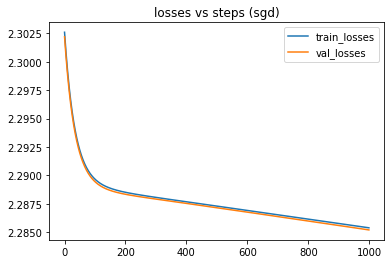

In [19]:
import matplotlib.pyplot as plt

plt.plot(train_losses_sgd,
         label="train_losses")
plt.plot(val_losses_sgd,
         label="val_losses")

plt.legend(loc="upper right")
plt.title("losses vs steps (sgd)")

plt.show()

(h) In the training loop, try tf.optimizers.Adam with learning rate = 0.001. Which one, SGD or 
Adam gives a better convergence speed in this case? 
Note: for a proper comparison of convergence, please ensure that the same random seed is used in 
both cases. 

In [20]:
opt = tf.optimizers.Adam(learning_rate=0.001)

train_losses_adam = []
val_losses_adam = []

re_initial()
for step in range(1000):
    train_loss, train_logits = one_train_step(x_train, y_train)
    val_logits = get_logit(x_val)
    val_cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y_val,
                                                                logits=val_logits)
    val_loss = tf.reduce_mean(val_cross_entropy)

    train_losses_adam.append(train_loss)
    val_losses_adam.append(val_loss)
    if (step + 1) % 100 == 0:
        print("Step: ", step + 1, "Train loss: ", float(train_loss), "Val loss: ", float(val_loss))

Step:  100 Train loss:  1.9804271528012936 Val loss:  1.9775076904919842
Step:  200 Train loss:  1.6324480123115748 Val loss:  1.6273823948693174
Step:  300 Train loss:  1.452934952189212 Val loss:  1.4512274194928598
Step:  400 Train loss:  1.355787933641268 Val loss:  1.352473755385554
Step:  500 Train loss:  1.303882211658549 Val loss:  1.3003036412204518
Step:  600 Train loss:  1.2740449876047557 Val loss:  1.2725047864196934
Step:  700 Train loss:  1.2501872731872314 Val loss:  1.250172077157178
Step:  800 Train loss:  1.2292636930171879 Val loss:  1.2309954966618717
Step:  900 Train loss:  1.2078729407094653 Val loss:  1.2089952079892847
Step:  1000 Train loss:  1.1823800896381247 Val loss:  1.1810272069073187


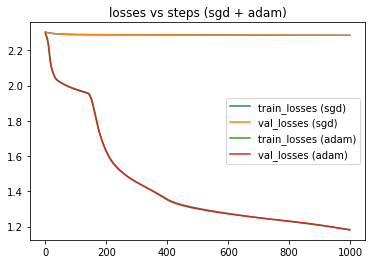

In [22]:
plt.plot(train_losses_sgd,
         label="train_losses (sgd)")
plt.plot(val_losses_sgd,
         label="val_losses (sgd)")

plt.plot(train_losses_adam,
         label="train_losses (adam)")
plt.plot(val_losses_adam,
         label="val_losses (adam)")

plt.legend()
plt.title("losses vs steps (sgd + adam)")

plt.show()

Adam gives a better convergence speed in this case

(i) In part (d), weights were initialized to 0.01. Try initializing the weights to be random samples of a 
normal distribution with mean 0 and standard deviation of 0.1. Which weight initialization gives 
better convergence speed?

Note: https://arxiv.org/pdf/2102.07004.pdf provides a good reference of weight initialization 
methods being used. 

In [23]:
train_losses_normal = []
val_losses_normal = []

tf.random.set_seed(0)

opt = tf.optimizers.SGD(learning_rate=0.001)

W1 = tf.Variable(tf.random.normal((784, 128), mean=0, stddev=0.1, dtype=tf.float64))
b1 = tf.Variable(tf.zeros([128], dtype=tf.float64))
W2 = tf.Variable(tf.random.normal((128, 10), mean=0, stddev=0.1, dtype=tf.float64))
b2 = tf.Variable(tf.zeros([10], dtype=tf.float64))

for step in range(1000):
    train_loss, train_logits = one_train_step(x_train, y_train)
    val_logits = get_logit(x_val)
    val_cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y_val,
                                                                logits=val_logits)
    val_loss = tf.reduce_mean(val_cross_entropy)

    train_losses_normal.append(train_loss)
    val_losses_normal.append(val_loss)
    if (step + 1) % 100 == 0:
        print("Step: ", step + 1, "Train loss: ", float(train_loss), "Val loss: ", float(val_loss))

Step:  100 Train loss:  2.4396658573697447 Val loss:  2.44211780256578
Step:  200 Train loss:  2.270288803398645 Val loss:  2.272956478414456
Step:  300 Train loss:  2.1527143593285243 Val loss:  2.155263678277739
Step:  400 Train loss:  2.058561580679381 Val loss:  2.0608555111092905
Step:  500 Train loss:  1.9762796494668629 Val loss:  1.978294507297937
Step:  600 Train loss:  1.9010790097452386 Val loss:  1.9027916318708393
Step:  700 Train loss:  1.8308608354296787 Val loss:  1.8322330206291784
Step:  800 Train loss:  1.7646653397722318 Val loss:  1.765680259397526
Step:  900 Train loss:  1.7020182032376934 Val loss:  1.7026829239631267
Step:  1000 Train loss:  1.6426629894068259 Val loss:  1.642995953106459


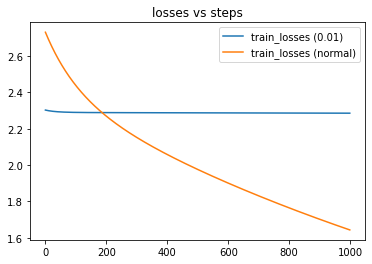

In [24]:
plt.plot(train_losses_sgd,
         label="train_losses (0.01)")

plt.plot(train_losses_normal,
         label="train_losses (normal)")

plt.legend()
plt.title("losses vs steps")

plt.show()

Normal distribution gives better convergence speed.

(j) Based on the choice of optimizer and weight initialization in part (h) and (i), re-train your neural 
network. Modify your training loop to stop training when the validation loss is not reduced further. 
Update your graph in (g). 

In [40]:
train_losses_normal_adam = []
val_losses_normal_adam = []

tf.random.set_seed(0)

opt = tf.optimizers.Adam(learning_rate=0.001)

W1 = tf.Variable(tf.random.normal((784, 128), mean=0, stddev=0.1, dtype=tf.float64))
b1 = tf.Variable(tf.zeros([128], dtype=tf.float64))
W2 = tf.Variable(tf.random.normal((128, 10), mean=0, stddev=0.1, dtype=tf.float64))
b2 = tf.Variable(tf.zeros([10], dtype=tf.float64))

step = 0

while True:
    train_loss, train_logits = one_train_step(x_train, y_train)
    val_logits = get_logit(x_val)
    val_cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y_val,
                                                                logits=val_logits)
    val_loss = tf.reduce_mean(val_cross_entropy)

    train_losses_normal_adam.append(train_loss)
    val_losses_normal_adam.append(val_loss)
    if (step + 1) % 100 == 0:
        print("Step: ", step + 1, "Train loss: ", float(train_loss), "Val loss: ", float(val_loss))
    
    if step > 1 and val_loss > val_losses_normal_adam[-2]:
        print(f"Step: {step}, validation loss is not reduced further. Training stops")
        break
    
    step += 1

Step:  100 Train loss:  0.27114123767522363 Val loss:  0.2638378775357485
Step:  200 Train loss:  0.17135636549796043 Val loss:  0.17678724286910263
Step:  300 Train loss:  0.1224248059959648 Val loss:  0.13934955927687626
Step:  400 Train loss:  0.0915410468091521 Val loss:  0.1188061486621341
Step:  500 Train loss:  0.07036949089077184 Val loss:  0.10694982006375542
Step:  600 Train loss:  0.05485335956491186 Val loss:  0.10013775085589534
Step:  700 Train loss:  0.043084329535985184 Val loss:  0.09637457486660687
Step:  800 Train loss:  0.034000960216457196 Val loss:  0.09447976635182322
Step: 892, validation loss is not reduced further. Training stops


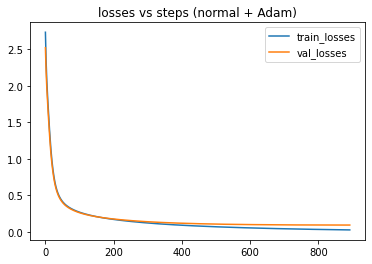

In [41]:
plt.plot(train_losses_normal_adam,
         label="train_losses")
plt.plot(val_losses_normal_adam,
         label="val_losses")

plt.legend(loc="upper right")
plt.title("losses vs steps (normal + Adam)")

plt.show()

(k) Compute the accuracy of your model using the test dataset obtained in part (a).  

In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix

test_logits = get_logit(x_test)

test_pred = np.argmax(test_logits, axis=1)
accuracy_score(np.argmax(y_test, axis=1), test_pred)

0.9723